In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = pd.read_csv('../Dataset/dermatology_database_1.csv')
df['age'] = pd.to_numeric(df['age'], errors = 'coerce')

df['age'] = df['age'].fillna(df['age'].mean())

Y = df['class']
X = df.drop('class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

Accuracy train: 1.0
Accuracy test: 0.9818181818181818

Recall train: 1.0
Recall test: 0.9818181818181818

Matrix train: 
[[87  0  0  0  0  0]
 [ 0 54  0  0  0  0]
 [ 0  0 63  0  0  0]
 [ 0  0  0 43  0  0]
 [ 0  0  0  0 47  0]
 [ 0  0  0  0  0 17]]
Matrix test: 
[[24  1  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  3]]

Best estimator grid: Pipeline(steps=[('scaler', StandardScaler()),
                ('KNeighborsClassifier',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=5,
                                      n_neighbors=10, weights='distance'))])
Best params grid: {'KNeighborsClassifier__algorithm': 'ball_tree', 'KNeighborsClassifier__leaf_size': 5, 'KNeighborsClassifier__n_neighbors': 10, 'KNeighborsClassifier__weights': 'distance'}


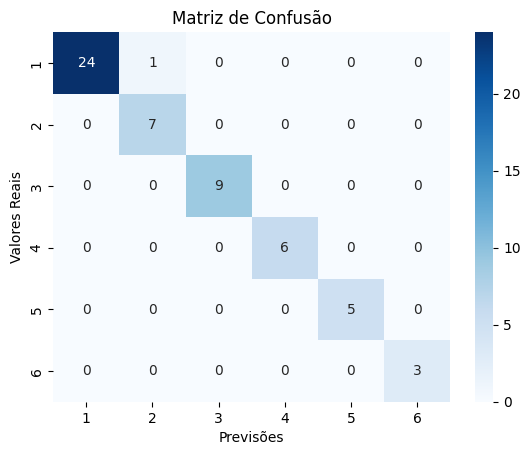

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('KNeighborsClassifier', KNeighborsClassifier())
])

parameters = {
    'KNeighborsClassifier__n_neighbors': [5, 10, 12, 20, 30],
    'KNeighborsClassifier__weights': ['uniform', 'distance'],
    'KNeighborsClassifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'KNeighborsClassifier__leaf_size': [5, 8, 20, 30, 50]
}

gridSearch = GridSearchCV(pipe, parameters, cv = 6, n_jobs = 4)
gridSearch.fit(X_train, Y_train)

predictTrainGrid = gridSearch.predict(X_train)
predictTestGrid = gridSearch.predict(X_test)

print(f"Accuracy train: {accuracy_score(Y_train, predictTrainGrid)}")
print(f"Accuracy test: {accuracy_score(Y_test, predictTestGrid)}\n")

print(f"Recall train: {recall_score(Y_train, predictTrainGrid, average = 'micro')}")
print(f"Recall test: {recall_score(Y_test, predictTestGrid, average = 'micro')}\n")

print(f"Matrix train: \n{confusion_matrix(Y_train, predictTrainGrid)}")
print(f"Matrix test: \n{confusion_matrix(Y_test, predictTestGrid)}\n")

print(f"Best estimator grid: {gridSearch.best_estimator_}")
print(f"Best params grid: {gridSearch.best_params_}")

import matplotlib.pyplot as plt

# Matriz de Confusão
cm = confusion_matrix(Y_test, predictTestGrid)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = gridSearch.classes_, yticklabels = gridSearch.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()